<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/ChebyshevPolynomial_SecondKind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Chebyshev Polynomials of the Second Kind
</h1></b>

Dr. Bingsen Wang

11/2/2024
</center>

#Python Code


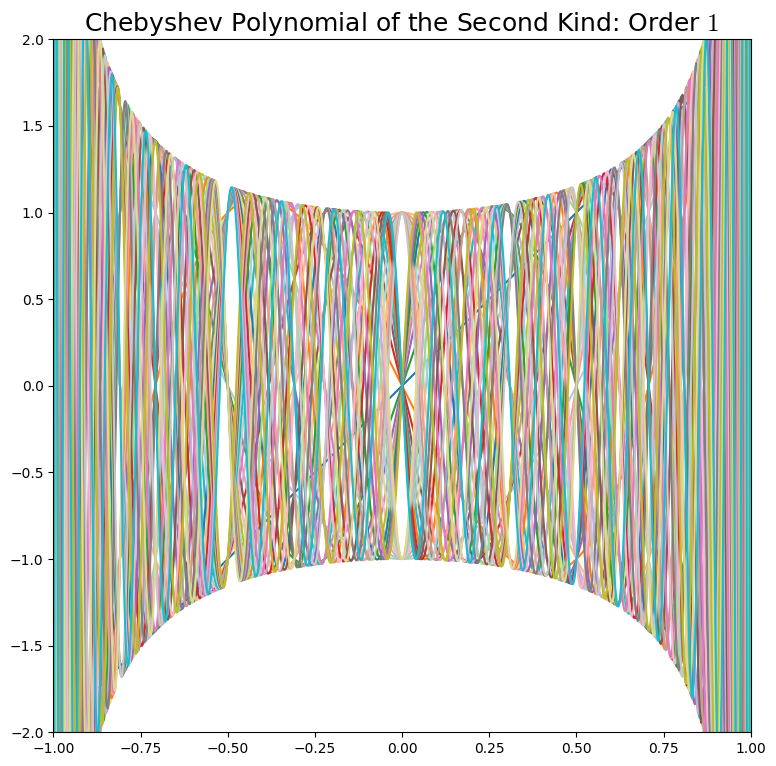

In [6]:
from numpy import linspace
from matplotlib import animation,pyplot,cm
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
def Un(x,Un1,Un2):
  return 2*x*Un1-Un2

Nf=40
clst = list(cm.tab20.colors) #colors of lines
x = linspace(-1,1,1000)
Un_lst = [2*x, 4*x*x-1]
[Un_lst.append(Un(x,Un_lst[-1],Un_lst[-2])) for _ in range(Nf-2)]
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_subplot(111,xlim=(-1,1),ylim=(-2,2))
lines=[ax.plot([],[],lw=1.5,c=clst[i%len(clst)])[0] for i in range(len(Un_lst))]
def animate(ii):
  # ii=2*Nf-1
  i=ii%Nf
  k=ii//Nf
  if k==0:
    ax.set_title(f"Chebyshev Polynomial of the Second Kind: Order ${i+1}$",size=18)
    lines[i-1].set_data([],[])
    lines[i].set_data(x,Un_lst[i])
  else:
    if i==0:
      ax.set_title(f"Chebyshev Polynomials of the Second Kind: Orders $1-{Nf}$",size=18)
    [lines[j].set_data(x[:(i+1)*len(x)//Nf],Un_lst[j][:(i+1)*len(x)//Nf]) for j in range(Nf)]
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf*2, interval=50)
anim.save("chebyshevPolynomials_SecondKind.mp4", writer=animation.FFMpegWriter(fps=5), dpi = 300)